# Hüpfende Astronauten - Praktische Einführung in die Bildverarbeitung am Beispiel einer Personenerkennung auf dem Mond

Sebastian Zug, TU Bergakademie Freiberg

Schülertuniversität 2023

------------------------------------------------

Agenda:

1. Einführung Jupyter Notebooks / Python
2. Basisfunktionen der Bildverarbeitung am Beispiel von opencv
3. Wo ist der Kerl? Anwendung auf Bilder vom Mond
4. Diskussion

Dienstag, 15.08.2023 - Zeitslot 12:15 - 14:00

------------------------------------------------

__Ziel: Bildbasierte Identifikation udn Lokalisierung von Astronauten in nicht-terrestrischen Umgebungen.__


Bei der Arbeit würden wir uns Hilfe von ChatGPT holen, um den Arbeitsfluss zu beschleunigen.

<span style='background :yellow' > 1. Aufgabe an ChatGPT: _Was sind Jupyer Notebooks?_ </span>

...

## Einführung Python / Jupyter Notebooks

### Python Basics

### Markdown Basics

<span style='background :yellow' > 2. Aufgabe an ChatGPT: _Schreiben Sie die Lösungsformel für quadratische Gleichungen als Latex / Markdown._ </span>

... und jetzt alles zusammen ...

### Jupyter Notebooks

### Zusammenfassung

Vorteile:

+ Codeblöcke können mit hilfreichen Notizen, Abbildungen und Links versehen werden.
+ Notebooks ermöglichen eine nichtlineare Ausführung. Codezellen können unabhängig voneinander ausgeführt werden.
+ Ausgaben (z. B. Meldungen, Diagramme und Datenrahmen) werden automatisch unter jeder Zelle angezeigt und sehen sofort nach der Installation gut aus.
+ Notebooks eignen sich gut für das Prototyping von Datenanalysen und den Austausch von Ergebnissen mit Kollegen.

Nachteile:

+ Notebooks erfordern die Installation des Pakets jupyter-notebook in Ihrer Python-Umgebung.
+ Notebooks müssen über einen Webbrowser bereitgestellt und aufgerufen werden, was ihre Verwendung etwas schwieriger macht als bei Skripten.
+ Die nichtlineare Ausführung kann die Fehlersuche verwirren, insbesondere wenn Sie den Überblick darüber verlieren, welche Zellen Sie ausgeführt haben und welche nicht.
+ Die gemeinsame Nutzung von Code oder Daten in Notebooks ist nicht einfach.

## Basisfunktionen der Bildverarbeitung

<span style='background :yellow' > 2. Aufgabe an ChatGPT: _Lies ein Bild in opencv ein und zeige es mit matplotlib an._ </span>

In [1]:
import cv2
from matplotlib import pyplot as plt

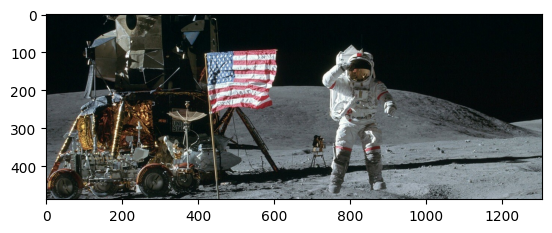

In [2]:
# Load an image from a file
image_path = 'Astronaut_jumping.png'
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is not None:
    # Display or process the image as needed
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
else:
    print("Image not loaded successfully.")

### Wie ist ein digitales Bild aufgebaut?

In [3]:
import numpy as np
a = np.asarray(image)
a.shape

(487, 1306, 3)

In [4]:
a.max()

255

In [5]:
b = a.copy()
b[:, :, 1] = 0
b[:, :, 2] = 0

b = np.where(b > 220, 255, 0)

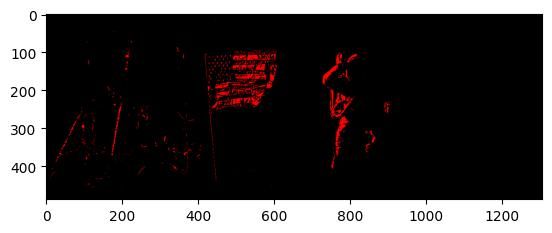

In [6]:
plt.imshow(b)

<span style='background :yellow' > 3. Aufgabe an ChatGPT: _Fügen Sie einen Filter ein, der auf einem Grauwert arbeitet._ </span>

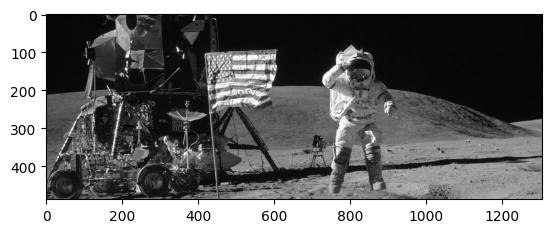

In [7]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap="gray")

<span style='background :yellow' > 4. Aufgabe an ChatGPT: _Ergänzen Sie eine rote Box um den Astronauten._ </span>

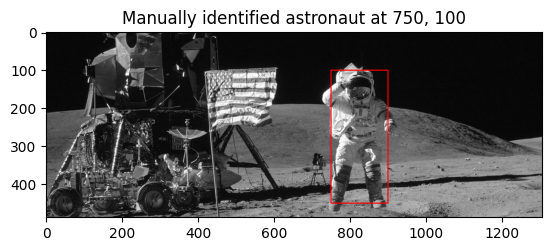

In [8]:
x, y, w, h = 750, 100, 150, 350  # Beispielkoordinaten und -größe

# Neues Bild erstellen, um das Ergebnis zu speichern
result_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)  # In ein BGR-Bild konvertieren

# Rechteck in das Bild zeichnen
red_color = (255, 0, 0)  # Rot in BGR
cv2.rectangle(result_image, (x, y), (x + w, y + h), red_color, 2)  # 2 ist die Dicke des Rechtecks

# Ergebnisbild anzeigen oder speichern
plt.imshow(result_image, cmap="gray")

plt.title(f"Manually identified astronaut at {x}, {y}")
plt.savefig("Astronaut_labeled.png")

... Ziel erreicht? Nein, das Ganze soll natürlich automatisch passieren!

## Automatische Erkennung von Astronauten durch den Roboter

<span style='background :yellow' > 5. Aufgabe: _Im Projektordner findet sich eine weitere Schwarzweiß-Bilddatei `Astronaut.png`. Laden Sie diese und stellen Sie den Inhalt dar._ </span>
    


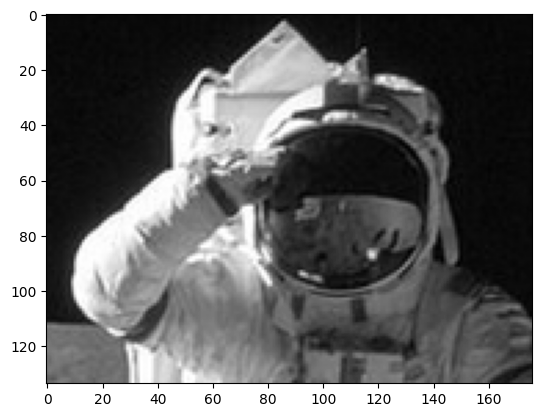

In [9]:
image_path = 'Astronaut_label.png'
template = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
gray_image_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Bild mit matplotlib darstellen
plt.imshow(gray_image_template, cmap="gray")

<span style='background :yellow' > 5. Aufgabe mit ChatGPT: _Nutzen Sie die opencv Funktion pattern, um den Astronauten "wiederzufinden"._ </span>

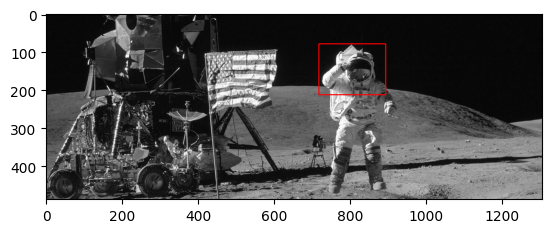

In [10]:
# Template Matching durchführen
result = cv2.matchTemplate(gray_image, gray_image_template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Koordinaten des gefundenen Musters
top_left = max_loc
bottom_right = (top_left[0] + gray_image_template.shape[1], 
                top_left[1] + gray_image_template.shape[0])

# Rechteck um das gefundene Muster zeichnen
matched_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
cv2.rectangle(matched_image, top_left, bottom_right, (255, 0, 0), 2)  # Rot in BGR

plt.imshow(matched_image)
#plt.imshow(result, cmap="gray")

<span style='background :yellow' > 6. Aufgabe mit ChatGPT: _Variieren Sie die Bildausschnitte, indem Sie das Ausgangsbild beschneiden und testen Sie die Robustheit unserer Lösung._ </span>

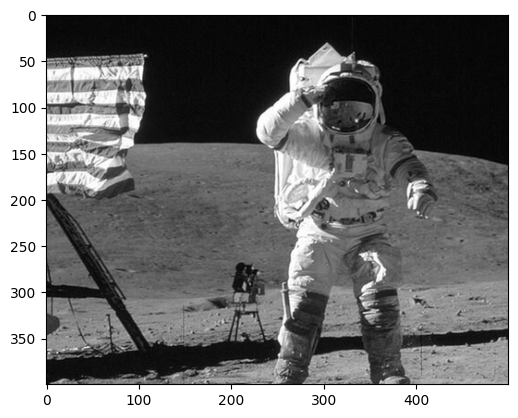

In [11]:
# Koordinaten des Bereichs, den du beschneiden möchtest
x = 500
y = 50
width = 500
height = 400

# Den angegebenen Bereich des Bildes ausschneiden
cropped_image = gray_image[y:y+height, x:x+width]
plt.imshow(cropped_image, cmap="gray")

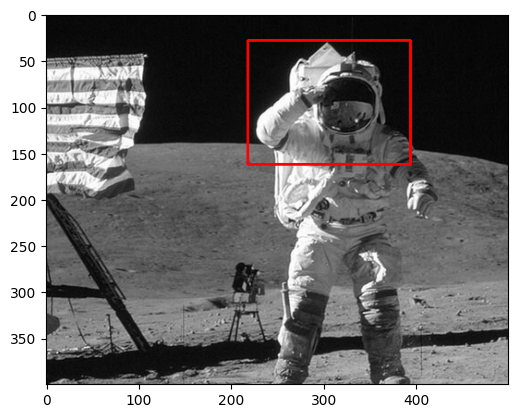

In [12]:
result = cv2.matchTemplate(cropped_image, gray_image_template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Koordinaten des gefundenen Musters
top_left = max_loc
bottom_right = (top_left[0] + gray_image_template.shape[1], 
                top_left[1] + gray_image_template.shape[0])

# Rechteck um das gefundene Muster zeichnen
matched_image = cv2.cvtColor(cropped_image, cv2.COLOR_GRAY2BGR)
cv2.rectangle(matched_image, top_left, bottom_right, (255, 0, 0), 2)  # Rot in BGR

plt.imshow(matched_image)

## Diskussion

<span style='color :red' > 1. Algorithmus: Wir vergleichen die Farbwerte einzelner Zellen - Die Lösung ist nicht rotations und skalierungsinvariant!.</span>

+ Correlation-based matching: Diese Methode verwendet die Kreuzkorrelation oder die normalisierte Kreuzkorrelation, um die Übereinstimmung zwischen den Bildern zu finden. Der korrelationsbasierte Abgleich ähnelt dem Vorlagenabgleich, kann aber für allgemeinere Bildabgleichsaufgaben verwendet werden, nicht nur für die Suche nach einer Übereinstimmung zwischen einer Vorlage und einem Bild.
+ Deep learning-based matching: Bei dieser Methode werden tiefe neuronale Netze verwendet, um Merkmale zu erlernen, die gegenüber Änderungen in den Bildern, wie z. B. Änderungen des Maßstabs, der Ausrichtung und der Beleuchtung, unveränderlich sind.
+ Optical flow: Diese Methode nutzt die Bewegung von Pixeln zwischen aufeinanderfolgenden Bildern, um die Korrespondenzen zwischen den Bildern zu bestimmen. Optische Flussmethoden werden häufig in der Videoverarbeitung eingesetzt und können zur Verfolgung von Objekten oder zur Schätzung der Kamerabewegung verwendet werden.
+ Structural similarity index (SSIM): Diese Methode verwendet eine Metrik für die Wahrnehmungsqualität, um die Ähnlichkeit zwischen zwei Bildern zu messen. Der SSIM-Index basiert auf den strukturellen Informationen in den Bildern, wie dem Mittelwert, der Standardabweichung usw.

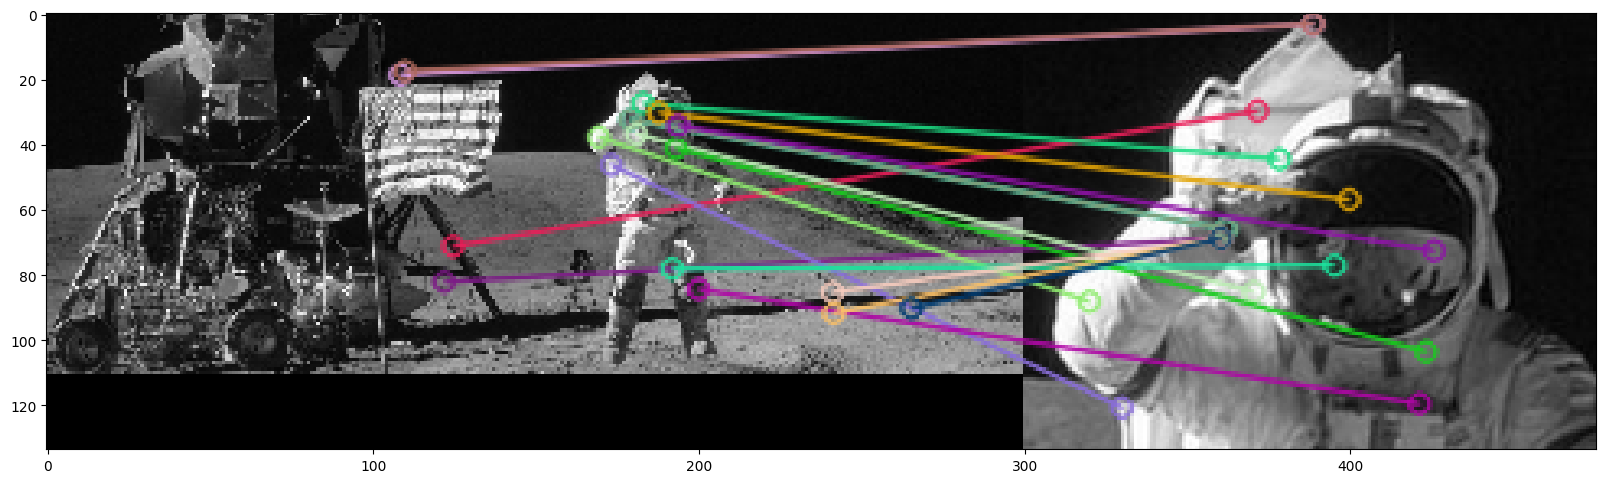

In [13]:
# SIFT (Scale-Invariant Feature Transform)

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Neue Breite für Ausgangsbild festlegen
new_width = 300
# Bild proportional skaliert ändern
height, width = gray_image.shape[:2]
aspect_ratio = width / height
new_height = int(new_width / aspect_ratio)
gray_image_scaled = cv2.resize(gray_image, (new_width, new_height))


# Detect SIFT keypoints and descriptors in the images
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(gray_image_scaled, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray_image_template, None)

# Use the BFMatcher to find the best matches between the descriptors
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Define a threshold for the ratio test
threshold = 0.75

# Filter the matches using the Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < threshold * n.distance:
        good_matches.append(m)

# Draw the matches on the images
img_matches = cv2.drawMatches(gray_image_scaled, keypoints1, gray_image_template, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the results
plt.figure(figsize = (20,10))
plt.imshow(img_matches)

<span style='color :red' > 2. Code: Wir "bauen" mit Hilfe von ChatGPT einen schnellen Prototypen, dieser ist aber ausgesprochen schlecht wartbar und sperrig!.</span>

<span style='color :red' > 3. Evaluation: Wir haben kein Gefühl dafür wie gut die Algorithmen funktionieren, es fehlen systematische Tests.</span>

<span style='color :red' > 4. Performance: Bislang spielte die Dauer der Berechnung keine Rolle. Was aber, wenn wir plötzlich 200.000 Bilder auswerten wollen oder eine echtzeitfähige Anwendung umsetzen wollen.</span>